## 1. การเตรียมข้อมูลก่อนทำการประมาณการ

* **เรียกใช้ library ในการอ่านและ cleaning data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **อ่านไฟล์ข้อมูลตามลักษณะไฟล์ และที่อยู่ของไฟล์**

In [2]:
data=pd.read_csv('https://github.com/Siriratkant/Decision-tree/raw/master/Bank_train.csv') #ไฟล์เก็บอยู่ใน github สามารถกด run ได้เลย 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**description**    
* **Gender** - เพศ
* **Married** - แต่งงานแล้วหรือยัง
* **Dependents** - อยู่คนเดียวหรือไม่ อยู่คนเดียวแทนด้วย = 0 อื่นๆ = 1,2,3 ตามลำดับ
* **Education** - เรียนจบหรือไม่
* **Self_Employed** - เจ้านายตัวเอง 
* **ApplicantIncome** - เงินเดือนคนกู้
* **CoapplicantIncome** - เงินเดือนคนค้ำประกัน
* **LoanAmount** - จำนวนเงินที่ขอกู้(หน่วยเป็น K (US daollar) )
* **Loan_Amount_Term** - ระยะเวลาผ่อน(งวด) 
* **Credit_History** - ประวัติการกู้ (ดี = 1.0 / แย่ = 0.0)
* **Property_Area** - บริเวณของ property (ในที่นี้อาจจะหมายถึงบ้าน คอนโด อสังหาริมทรัพย์อื่นๆ)
* **Loan_Status** - สถานะการขอกู้ (Y = ผ่าน / N = ไม่ผ่าน)

* **ตรวจสอบลักษณะของข้อมูล** 

In [3]:
data.shape #เช็คว่ามีข้อมูลกี่แถวกี่คอลัมน์

(614, 13)

In [4]:
data.info() #เช็คว่าข้อมูลมีลักษณะอย่างไร มี missing value หรือไม่ จากรูปจะเห็นได้ว่าเรามี missing value อยู่ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


* **หมายเหตุ : ควรทำการตัดคอลัมน์ที่ไม่ต้องการออกก่อน เพื่อป้องกันไม่ให้เกิดการตัดแถวที่ต้องการออกไป แต่ในที่นี้เราเอาทุกคอลัมน์มาคำนวณ** 

## 1.กำจัด missing value

In [5]:
data.dropna(inplace=True) #วิธีการจัดการกับ missing value นั้นมีอยู่หลายวิธี แต่เบื้องต้นเราจะใช้วิธีการตัดแถวที่มี missing value ออก โดยใช้คำสั่งนี้

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# เฉลยข้อ 5.3 ตอบ a

In [7]:
data.Loan_Status.value_counts() #เช็คว่าคอลัมน์ Loan_status แบ่งออกเป็นกี่กลุ่ม และแต่ละกลุ่มเท่าไร ในที่นี้แบ่งงออกเป็น 2 กลุ่ม  มี Y = 322 และ N = 148

Y    332
N    148
Name: Loan_Status, dtype: int64

In [8]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## 2. แปลงข้อมูลที่เป็น Category ให้อยู่ในรูป Dummy variable 

In [10]:
a = pd.get_dummies(data['Gender'], prefix = "Gender") #แปลง column ที่เป็น category ให้อยู่ในรูป dummy variable
b = pd.get_dummies(data['Married'], prefix = "Married")
c = pd.get_dummies(data['Education'], prefix = "Education")
d = pd.get_dummies(data['Self_Employed'], prefix = "Self_Employed")
e = pd.get_dummies(data['Credit_History'], prefix = "Credit_History")
f = pd.get_dummies(data['Property_Area'], prefix = "Property_Area")
g = pd.get_dummies(data['Dependents'], prefix = "Dependents")

In [11]:
frames = [data, a, b, c,d,e,f,g] #รวมตาราง dummy ที่สร้างเข้ากับ dataframe เดิม
data = pd.concat(frames, axis = 1)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,1,1,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,0,1,0,0,1,1,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,0,1,0,0,1,1,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0,0,1,0,0,1,1,0,0,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,0,1,0,0,1,0,0,1,0


In [12]:
data = data.drop(columns = ['Gender', 'Married','Education','Self_Employed','Credit_History','Property_Area','Dependents']) #ลบคอลัมน์ที่เป็ฯ category ออก
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,LP001003,4583,1508.0,128.0,360.0,N,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,Y,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,Y,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,Y,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,Y,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


## 3.	เปลี่ยนข้อมูลใน Loan_Status column  จาก yes/no เป็น 1/0 ตามลำดับ

In [13]:
def label2val(s):
    d = {'N': 0, 'Y': 1 }
    if s in d.keys():
        v = d[s]
    else:
        v = np.nan
    return v

In [14]:
label2val('Y')

1

In [15]:
data[['Loan_Status']].applymap(label2val)

,Loan_Status
1,0
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,0
10,1


In [16]:
likert_cols = ['Loan_Status']
data[likert_cols]=data[likert_cols].applymap(label2val)

## 4.แบ่งข้อมูล training set และ testing set กำหนดให้ Test_size = 0.3, random_state = 7

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [19]:
columns = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+']

In [20]:
y = data.Loan_Status.values
x = data[columns]

In [21]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3,random_state = 7)

In [22]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
390,9167,0.0,185.0,360.0,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
280,4053,2426.0,158.0,360.0,0,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0
208,2479,0.0,59.0,360.0,0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
101,4843,3806.0,151.0,360.0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
569,3166,2064.0,104.0,360.0,0,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


## 5. ทำการประมาณการข้อมูล โดยใช้ Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier(criterion='gini',random_state = 1, min_samples_leaf = 20) #ใช้ Gini เป็นตัวแบ่ง,กำหนด random_stat =1 , กำหนดให้แต่ละ leaf มี sample ได้ไม่เกิน 20 
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [25]:
from sklearn.externals.six import StringIO  # StringIO จะทำหน้าที่เก็บค่าจาก export_graphviz
from sklearn.tree import export_graphviz
import pydotplus #เอาไว้แปลงข้อมูลเพื่อที่จะได้สร้างกราฟได้
from IPython.display import Image  

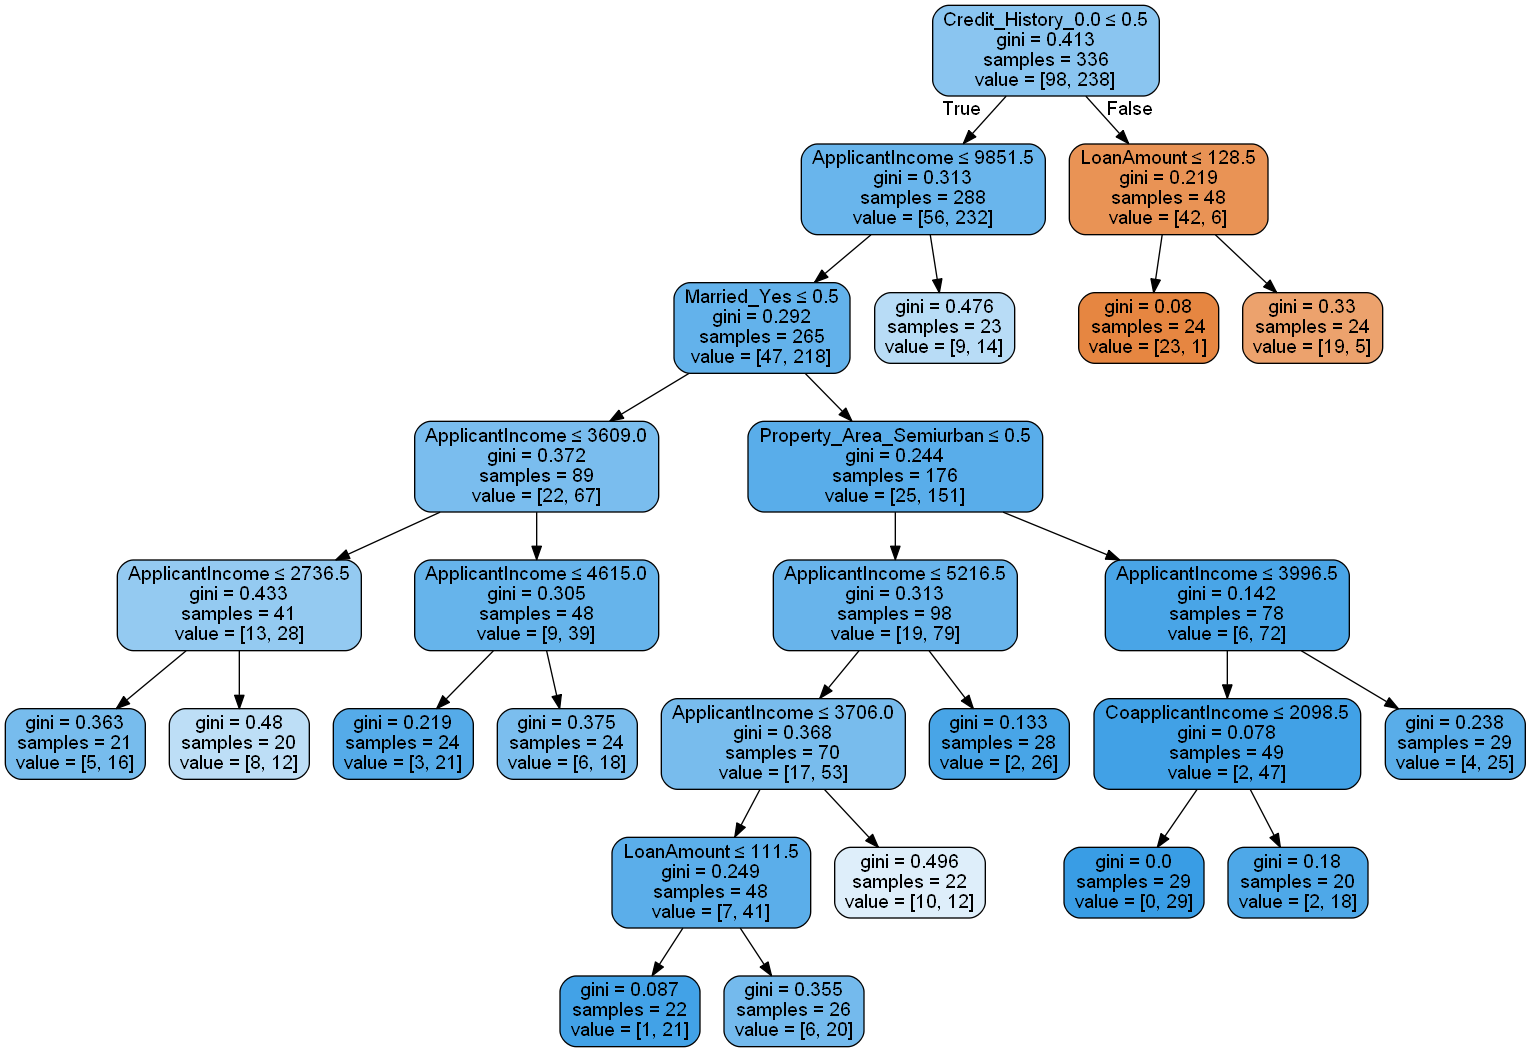

In [26]:
dot_data = StringIO() #สร้าง object ชื่อ dot_data และให้เท่ากับ StringIO
export_graphviz(model, out_file=dot_data,  #.ใส่ค่าลงไป โดยอันแรกเราก็จะใส่ model ที่เป็น object ที่เก็บค่าการประมาณการของเราไว้ และ 
                feature_names=columns, #คือ feature ที่เรามี 
                filled=True, rounded=True,  
                special_characters= True ) #เช่นพวกค่าน้อยกว่าหรือเท่ากับ

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #สร้าง object ชื่อ graph เพื่อใส่คำสั่ง pydotplus ซึ่งเป็นคำสั่งในการ พล็อตรูป
Image(graph.create_png()) #และเราก็ใส่คำสั่ง Imageให้มันพล็อตกราฟที่เราสร้างไว้ให้ออกมาในรูป .png 

# อ่านคำสั่งเพิ่มเติมได้ที่ :  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

## 6.นำ model ที่ได้ไปใช้กับ testing set

In [27]:
predicted = model.predict(x_test)
predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [28]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,LP001003,4583,1508.0,128.0,360.0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


## 7.เช็คความแม่นยำของ model

In [29]:
from sklearn import metrics #เรียกใช้ library ของ sklearn โดยใช้คำสั่ง metrics เพื่อที่จะใช้คำสั่ง confusion matrix

In [30]:
metrics.confusion_matrix(y_test,predicted) #ข้อเสียคือจะไม่มีชื่อแกนให้ และตารางตำแหน่งไม่ค่อยตรงทำให้ดูยาก ใช้คำสั่ง crosstab ดีกว่า

array([[21, 29],
       [ 1, 93]], dtype=int64)

In [31]:
pd.crosstab(y_test, predicted) 

col_0,0,1
row_0,,
0,21,29
1,1,93


# เฉลยข้อ 5.4 ตอบ b

In [32]:
Accuracy = (21+93 ) / (21+29+1+93) 
Accuracy

0.7916666666666666

In [33]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        50
           1       0.76      0.99      0.86        94

   micro avg       0.79      0.79      0.79       144
   macro avg       0.86      0.70      0.72       144
weighted avg       0.83      0.79      0.76       144



## 8. ลองนำมาใช้กับข้อมูลใหม่

โดยในขั้นแรกนั้น เราต้องทำการ clean ข้อมูลให้เหมือนกับข้อมูล training set ก่อน

In [34]:
df=pd.read_csv('https://github.com/Siriratkant/Decision-tree/raw/master/Bank_new_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [36]:
df.dropna(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              289 non-null object
Gender               289 non-null object
Married              289 non-null object
Dependents           289 non-null object
Education            289 non-null object
Self_Employed        289 non-null object
ApplicantIncome      289 non-null int64
CoapplicantIncome    289 non-null int64
LoanAmount           289 non-null float64
Loan_Amount_Term     289 non-null float64
Credit_History       289 non-null float64
Property_Area        289 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [38]:
A = pd.get_dummies(df['Gender'], prefix = "Gender")
B = pd.get_dummies(df['Married'], prefix = "Married")
C = pd.get_dummies(df['Education'], prefix = "Education")
D = pd.get_dummies(df['Self_Employed'], prefix = "Self_Employed")
E = pd.get_dummies(df['Credit_History'], prefix = "Credit_History")
F = pd.get_dummies(df['Property_Area'], prefix = "Property_Area")
G = pd.get_dummies(df['Dependents'], prefix = "Dependents")

In [39]:
f = [df, A, B,C,D,E,F,G]
df = pd.concat(f, axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,...,0,0,1,0,0,1,1,0,0,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,...,0,0,1,0,0,1,0,1,0,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,...,0,0,1,0,0,1,0,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,...,0,0,1,0,0,1,1,0,0,0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,...,1,0,1,0,0,1,1,0,0,0


In [40]:
df = df.reset_index() #Reset_index ก่อนทำการ Run Models
df

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,...,0,0,1,0,0,1,1,0,0,0
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,...,0,0,1,0,0,1,0,1,0,0
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,...,0,0,1,0,0,1,0,0,1,0
3,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,...,0,0,1,0,0,1,1,0,0,0
4,5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,...,1,0,1,0,0,1,1,0,0,0
5,6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,...,0,0,1,0,1,0,0,1,0,0
6,7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,...,0,1,0,1,0,0,0,0,1,0
7,9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,...,0,0,1,0,1,0,1,0,0,0
8,10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,...,0,0,1,0,0,1,1,0,0,0
9,14,LP001096,Female,No,0,Graduate,No,4666,0,124.0,...,0,0,1,0,1,0,1,0,0,0


In [41]:
df = df.drop(columns = ['index','Gender', 'Married','Education','Self_Employed','Credit_History','Property_Area','Dependents'] ) #P'Kiak Drop Index Filled

In [42]:
df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 22 columns):
Loan_ID                    289 non-null object
ApplicantIncome            289 non-null int64
CoapplicantIncome          289 non-null int64
LoanAmount                 289 non-null float64
Loan_Amount_Term           289 non-null float64
Gender_Female              289 non-null uint8
Gender_Male                289 non-null uint8
Married_No                 289 non-null uint8
Married_Yes                289 non-null uint8
Education_Graduate         289 non-null uint8
Education_Not Graduate     289 non-null uint8
Self_Employed_No           289 non-null uint8
Self_Employed_Yes          289 non-null uint8
Credit_History_0.0         289 non-null uint8
Credit_History_1.0         289 non-null uint8
Property_Area_Rural        289 non-null uint8
Property_Area_Semiurban    289 non-null uint8
Property_Area_Urban        289 non-null uint8
Dependents_0               289 non-null uint8
Dependents_1    

In [44]:
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+']]

## 8.จากนั้นนำ model ที่ได้จาก training set มาใช้กับข้อมูลใหม่ นั่นคือข้อมูลชุดที่ 2 (ชื่อไฟล์ Bank_new_data.csv)

In [45]:
P =model.predict(X)

In [46]:
P

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

## 9.ทำการนำค่า predicted ที่ได้จาก Bank_new_data.csv ไปรวมในตารางข้อมูล Bank_new_data.csv 

In [47]:
test=pd.DataFrame(df) 

# เฉลยข้อ 5.5 ตอบ a

In [48]:
dt=pd.concat([test, pd.Series(P, name='P')], axis='columns')
dt.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,P
0,LP001015,5720,0,110.0,360.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
2,LP001031,5000,1800,208.0,360.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,LP001051,3276,0,78.0,360.0,0,1,1,0,0,...,0,1,0,0,1,1,0,0,0,1
4,LP001054,2165,3422,152.0,360.0,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,1


In [49]:
pd.set_option('display.max_columns', None)
dt.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,P
0,LP001015,5720,0,110.0,360.0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1
2,LP001031,5000,1800,208.0,360.0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1
3,LP001051,3276,0,78.0,360.0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1
4,LP001054,2165,3422,152.0,360.0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1


# เฉลยข้อ 5.6 ตอบ a

In [50]:
dt.P.value_counts()

1    243
0     46
Name: P, dtype: int64

พิเศษ : กรณีที่ต้องการ save dataframe ด้านบนใหอยู่ในรูป csv เพื่อนำไปใช้ สามารถได้โดยการใส่คำสั่ง dt.to_csv  ด้านล่าง

dt.to_csv('ที่อยู่ที่ต้องการบันทึก\\ชื่อไฟล์.csv', index = False #ไม่เอา column index)